### 1. Найдите минимально необходимый объем выборки для построения интервальной оценки среднего с точностью ∆ = 3, дисперсией σ^2 = 225 и уровнем доверия β = 0.95.

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import numpy as np
import math
import matplotlib.pyplot as plt

In [42]:
var = 225
sigma = math.sqrt(var) # Стандартное отклонение
Z = stats.norm.ppf((1+0.95)/2)
e = 3 # Погрешность

N = ((sigma*Z)/e)**2 #Находим минимальный объем выборки
math.ceil(N) #Округляем, так как это человек (а не 1,5 землекопа)

97

### 2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

In [3]:
alpha = 0.0005 #Используем Two-sample T-test
#Нулевая гипотеза: различия между выборками незначительны # Альтернативная гипотеза: различия между выборками существенны
population_men  =stats.norm.rvs(loc=19,scale=171,size=11000000)  # Выборка мужчин со средним ростом 171
population_women =stats.norm.rvs(loc=16,scale=165,size=12000)  # Выборка женщин со средним ростом 165
from scipy.stats import ttest_ind
stat, p_value = ttest_ind(population_men,population_women, equal_var = False) #Делаем поправку, что дисперсии неодинаковы
print('t=%.3f, p=%.3f' % (stat, p_value))

t=3.143, p=0.002


In [4]:
# interpret via p-value
if p_value > alpha:
    print('Принимаем гипотезу о незначительности различий выборок')
else:
    print('Отвергаем гипотезу о незначительности различий выборок')

Принимаем гипотезу о незначительности различий выборок


### 3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

In [46]:
sigma = 150 # Стандартное отклонение
Z = stats.norm.ppf((1+0.95)/2)
e = 50 # Погрешность
N = ((sigma*Z)/e)**2 #Находим минимальный объем выборки
math.ceil(N) #Округляем, так как кол-во чеков - дискретная величина

35

### 4. Представьте, что вы хотите разоблачить "волшебника", который считает, что умеет предсказывать погоду на завтра. Отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого периода времени и получили такие результаты (см.ниже). Можно ли сказать, что маг действительно умеет предсказывать погоду, если уровнь значимости принять за 0.05 ?

In [26]:
observations = pd.DataFrame([[14,36],[15,45]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,14,36
Солнце,15,45


In [48]:
#Нулевая гипотеза: различия между ответом волшебника и реальностью незначительны 
#Альтернативная гипотеза: различия между ответом волшебника и реальностью существенны
from scipy.stats import chi2_contingency
chi, pval, dof, exp = stats.chi2_contingency(observations)
significance = 0.05 #задаем уровень значимости
print('p-value=%.6f, significance=%.2f\n' % (pval, significance))


if pval < significance:
    print("""На уровне значимости %.2f , мы отвергаем нулевую гипотезу и принимаем H1. 
            Различия между ответом волшебника и реальностью значительны.""" % (significance))
else:
    print("""На уровне значимости %.2f , мы принимаем нулевую гипотезу. 
            Различия между ответом волшебника и реальностью незначительны.""" % (significance))

p-value=0.890018, significance=0.05

На уровне значимости 0.05 , мы принимаем нулевую гипотезу. 
            Различия между ответом волшебника и реальностью незначительны.


### 5. Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия 90% для выборки:
data = [1,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5]

In [69]:
data_1 = [1,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5]

In [91]:
# Функция, которая строит доверительный интервал

def mean_confidence_interval(data, confidence=0.95): #По умолчанию указан уровень доверия 0,95
    """Находим доверительный интервал через квантиль Стьюдента с степенью свободы n-1"""
    n = len(data)
    m, se = np.mean(data), stats.sem(data)
    h = (se / math.sqrt(n))* stats.t.ppf((1 + confidence)/2, n)
    return m-h,m, m+h #выводит значение лев границы дов интервала,хсреднего, прав границы дов интервала

print(mean_confidence_interval(data_1, 0.9)) #Указываем уровень доверия = 0.9

(6.338600762316752, 6.4411764705882355, 6.543752178859719)


In [81]:
#Расчет вручную (z-score)
len(data_1) # 35>30 => можно использовать z-score
np.mean(data_1) #находим среднее
len(data_1) #Находим кол-во элементов в выборке
stats.sem(data_1) #Находим СКО
Z = stats.norm.ppf((1+0.9)/2) #Находим Z-score (можно по таблице найдя в ней значение 0,95 - тогда перечесение названий стб и стр - 1,65)
delta = (stats.sem(data_1) / math.sqrt(len(data_1)))*Z
m_low = np.mean(data_1) - delta #нижнее значение доверительного интервала
m_high = np.mean(data_1) + delta #верхнее значение доверительного интервала
print(m_low,np.mean(data_1),m_high)

6.433553537952351 6.4411764705882355 6.44879940322412


In [89]:
#Расчет вручную (t-критерий, т.к. выборка небольшая)
n = len(data_1)
np.mean(data_1) #находим среднее
len(data_1) #Находим кол-во элементов в выборке
stats.sem(data_1) #Находим СКО
t = stats.t.ppf((1+0.9)/2,n) #Находим t-квантиль распределения Стьюдента со степенью свободы n-1
delta = (stats.sem(data_1) / math.sqrt(len(data_1)))*t
m_low = np.mean(data_1) - delta #нижнее значение доверительного интервала
m_high = np.mean(data_1) + delta #верхнее значение доверительного интервала
print(m_low,np.mean(data_1),m_high)

6.338600762316752 6.4411764705882355 6.543752178859719


### 6. Принадлежит ли выборка data_1 и data_2 одному множеству? Оцените это с помощью известных вам тестов проверки гипотез.

In [6]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]
data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

In [7]:
#Используем Двух-выборочный T-test (Две выборки), чтобы проверить имеют ли две выборки данных разные средние значения. 
#Здесь мы принимаем нулевую гипотезу о том, что обе группы имеют равные средние.
stats.ttest_ind(a=data_1,b=data_2,equal_var=False) #Ставим equal_var=False чтобы сделать поправку на разные значения n в выборках

Ttest_indResult(statistic=7.068404675178226, pvalue=2.4974180382616264e-09)

In [8]:
# Итак, мы видим, что у нас есть менее 0.000000249% шансов найти равенство между образцами.

In [9]:
print(np.mean(data_1),np.mean(data_2))

6.628571428571429 3.967741935483871


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023186480A90>]],
      dtype=object)

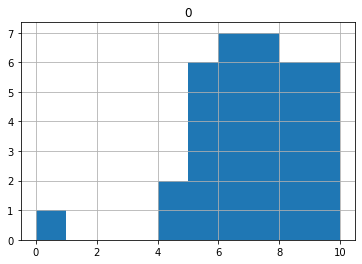

In [10]:
pd.DataFrame(data_1).hist(bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023186BD9760>]],
      dtype=object)

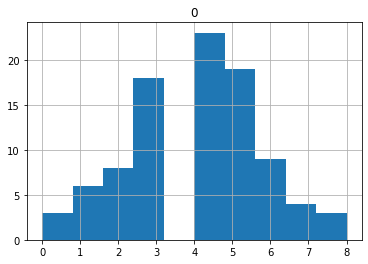

In [11]:
pd.DataFrame(data_2).hist(bins=10)

### 7. На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение.
Предположим, Вы сформировали две гипотезы: Нулевая гипотеза - распределение нормальное, Альтернативная гипотеза - распределение не нормальное.
Допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости (p-value) = 0.03. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет? Вопрос без подвоха)

Ответ: p-value – это как-бы «жизнеспособность» нулевой гипотезы, которую мы оцениваем по имеющимся данным. 
В нашем случае вероятность того, что значения цен на жилье, действительно распределены нормально, и есть p-value. 
Иными словами, чем меньше значение p, тем сильнее аргументы против нулевой гипотезы. Традиционно полагают, если p-value 0.05,
то аргументов достаточно, чтобы отвергнуть нулевую гипотезу. Наше значение p = 0.03 и мы отвергаем нулевую гипотезу, что данные распределены 
нормально

### 8. Первая выборка — это пациенты, которых лечили препаратом А.  Вторая выборка — пациенты, которых лечили препаратом Б. Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

#### а) Требуется выяснить, имеется ли значимое различие эффективности препаратов А и Б, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (уровень значимости принять за 5% или 0.05)

#### b) При каком минимальном P-values различия были бы уже значимы? 

In [12]:
np.random.seed(11)
A = stats.norm.rvs(scale=50,loc=10,size=300)
B = A+stats.norm.rvs(scale=10,loc=-1.25,size=300)

#Ваш код:
# Подсказка, обратити внимание на Two-sample T-test

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023186DDDD30>]],
      dtype=object)

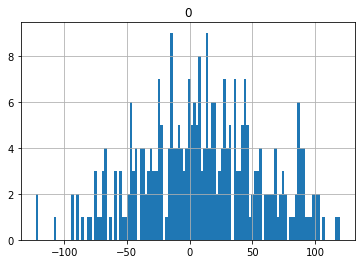

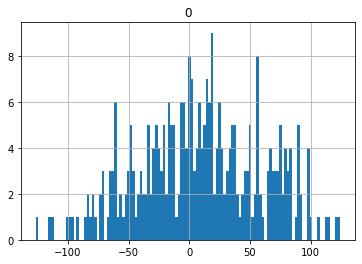

In [13]:
pd.DataFrame(A).hist(bins=120)
pd.DataFrame(B).hist(bins=120)

In [14]:
# Нулевая гипотеза: различия в эффективности препаратов незначительны
# Альтернативная гипотеза: различия в эффективности препаратов значительны
alpha = 0.05
stats.ttest_ind(a=A,b=B,equal_var=False)

Ttest_indResult(statistic=0.33196234898293125, pvalue=0.7400341626811637)

In [15]:
# interpret via p-value
if p_value > alpha:
    print('Принимаем гипотезу о незначительности различий выборок')
else:
    print('Отвергаем гипотезу о незначительности различий выборок')

Отвергаем гипотезу о незначительности различий выборок


Ответ 1: Значение 0,74 говорит о том, что существует вероятность 74% того, что выборочные данные для двух 
идентичных групп не сильно различаются (мы принимаем нулевую гипотезу). Это больше, чем уровень значимости 5%.
Ответ 2: В случае, если бы p_value = уровень значимости, т.е. p_value = 0.05 различия были бы уже значимы.